# Analyzing the Stroop Effect


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#definitions">Definitions</a></li>
<li><a href="#test">Statistical Test</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
### Introduction
Use descriptive statistics and a statistical test to analyze the [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect), a classic result of experimental psychology.

<a id='definitions'></a>
### Definitions
<br/>
**Independent and dependent variables**

><u>Independent Variable</u>: Type of words conditions (Congruent, Incongruent) <br/>
><u>Dependent Variable</u>: Test completion time<br/>

**Null and alternative hypotheses**

>Null Hypothesis - The average test completion time in Incongruent words condition is less or equal to average  test completion time in Congruent words condition.
$$ H_0: \mu_{Incongruent} \leq \mu_{Congruent} $$

> Alternative Hypothesis - Average test completion time in Incongruent words condition is greater than average test completion time in Congruent words condition at a Type I error rate of 5%.
$$ H_1: \mu_{Incongruent} > \mu_{Congruent} $$ 

> Symbol definitions:
* H<font size="-2">0</font>: Null Hypothesis
* H<font size="-2">1</font>: Alternative Hypothesis
* &mu;: Population Mean
* Congruent: Congruent words condition
* Incongruent: Incongruent words condition
* &mu;<font size="-2">Congruent</font>: Population mean of test completion time in Congruent Words Condition
* &mu;<font size="-2">Incongruent</font>: Population mean of test completion time in Incongruent Words Condition

> When I took the test, it took me 12.169 seconds for the Congruent words condition and 25.383 seconds for the Incongrudent words condition. I should be able to observe the same for the data provided.  I came up with "Average test completion time in Incongruent words condition is greater than average test completion time in Congruent words condition" as the alternative hypothesis since this is what I like to prove to be true.

> The null hypothesis should be opposite of the alternative and it usually states that two groups are equal.  So I came up with "The average test completion time in Incongruent words condition is less or equal to average  test completion time in Congruent words condition." as the null hypothesis.

> I picked Type 1 error rate to be 5% as it is the standard threshold of Type I error. 

> I would use the Paired Samples T Test for my hypothesis testing.  The T test compares two averages and find if they are different from each other, and the dependent samples are essentially connected — they are tests on the same person.

> Paired Samples T Test assumes:<br/>
* The differences are of measurement variables.<br/>
* Sampling (or allocation) is random and pairs of observations are independent.<br/>
* The distribution of the mean difference is normal.<br/>

<a id='test'></a>
### Statistical Test

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data
df = pd.read_csv('data/stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
# Find descriptive statistics
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [3]:
# Find Range
df.max() - df.min()

Congruent      13.698
Incongruent    19.568
dtype: float64

In [4]:
# Find Interquartile range
df.quantile(0.75) - df.quantile(0.25)

Congruent      4.30550
Incongruent    5.33475
dtype: float64

In [5]:
# Find Variance
df.var()

Congruent      12.669029
Incongruent    23.011757
dtype: float64

> Here are some descriptive statistics regarding this dataset.


| Statistics              | Congrudent     | Incongrudent     |
| ----------------------- |:--------------:| ----------------:|
| Count                   | 24             | 24               |
| Minimum                 | 8.630          | 15.687           |
| Maximum                 | 22.328         | 35.255           |
| Range                   | 13.698         | 19.568           |
| Mean                    | 14.051125      | 22.015917        |
| Median                  | 14.3565        | 21.0175          |
| Interquartile range     | 4.30550        | 5.33475          |
| Variance                | 12.669029      | 23.011757        |
| Standard deviation      | 3.559358       | 4.797057         |

Distribution of the sample data

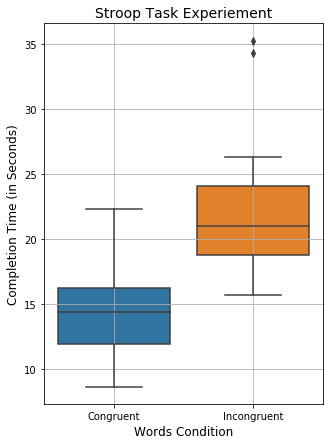

In [6]:
# Visualization
plt.figure(figsize=(5,7))

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.title('Stroop Task Experiement', fontsize=14)
plt.ylabel('Completion Time (in Seconds)', fontsize=12)
plt.xlabel('Words Condition', fontsize=12)

plt.grid(True)

> The average test completion time is longer in Incongruent words condition.

> The range of test completion time is wider in Congruent words condition.

> Everybody took longer to complete the test in Incongrument words condition than the average test completion time in Congruent words condition.

> There are couple of people who took a lot longer (outliers) than normal range of the distribution in Incongruent words condition.

Perform the statistical test and report the results.

In [7]:
# Perform the Paired T-Test
t_value, p_value = stats.ttest_rel(df['Congruent'],df['Incongruent'])

# I'm testing "the average test completion time in Incongruent words condition is greater than 
# the average test completion time in Congruent words condition". This is one-tailed test. 
# Dividing p-value returned from ttest_rel() by 2 to get the one-tailed p-value.
t_value, p_value/2

(-8.020706944109957, 2.051500292855589e-08)

<a id='conclusions'></a>
### Conclusions

> I picked Type 1 error rate to be 5% as it is the standard threshold of Type I error.

>The (one-tailed) p-value of the Paired T-Test is 2.0515002928555891e-08 which is way less than 5% (2.0515002928555891e-08 < 0.05), and it is statistically significant.  We reject the null hypothesis.  We can say that the average test completion time in Incongruent words condition is greater than the average test completion time in Congruent words condition.

&nbsp;